In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\huang\Desktop\Hirebeat\social_media_tracking\10222024_snapshot\post_sentiment_analysis.csv")
print(df.head(10))

      post_id  created_at_utc  last_upserted_at  final_weight  \
0  t3_1g9bi33      1729577645        1729732958         90.98   
1  t3_1g974yg      1729562420        1729732958         64.23   
2  t3_1g938a0      1729551037        1729732960         51.99   
3  t3_1g97ewu      1729563235        1729732957         36.71   
4  t3_1g9hotx      1729602427        1729732959         30.89   
5  t3_1g9nywl      1729618491        1729732958         30.65   
6  t3_1g9hurq      1729602898        1729732957         26.58   
7  t3_1g9o6se      1729619045        1729732960         21.92   
8  t3_1g95toa      1729558362        1729732959         21.41   
9  t3_1g9c3k4      1729580313        1729732959         20.55   

   sentiment_score  happiness  sadness  fear  anger  surprise  disgust  \
0            26.12       30.3      0.2   1.2    0.0       5.4      0.0   
1           -25.82        1.7      9.1  12.7   26.4       5.7      1.2   
2           -11.30        1.0     15.8  12.3    1.9      13.5 

In [3]:
# Trim out non-numerical columns
df_numerical = df.select_dtypes(include=['number'])

# Display the first few rows of the numerical DataFrame
print(df_numerical.head())

   created_at_utc  last_upserted_at  final_weight  sentiment_score  happiness  \
0      1729577645        1729732958         90.98            26.12       30.3   
1      1729562420        1729732958         64.23           -25.82        1.7   
2      1729551037        1729732960         51.99           -11.30        1.0   
3      1729563235        1729732957         36.71            29.37       30.1   
4      1729602427        1729732959         30.89            -2.35        1.8   

   sadness  fear  anger  surprise  disgust  upvotes  downvotes  num_comments  \
0      0.2   1.2    0.0       5.4      0.0     5539        335            76   
1      9.1  12.7   26.4       5.7      1.2     1237         35           170   
2     15.8  12.3    1.9      13.5      0.0     1272        152           254   
3      0.0   0.0    0.0       3.7      0.0     1141         56           163   
4      2.4   1.2    3.4       4.0      0.0      303          0             0   

   total_awards_received  
0    

In [4]:
df_numerical['time_elapsed_in_secs'] = df_numerical['last_upserted_at'] - df_numerical['created_at_utc']
df_numerical = df_numerical.drop(['created_at_utc','last_upserted_at'],axis = 1)
print(df_numerical.head())

   final_weight  sentiment_score  happiness  sadness  fear  anger  surprise  \
0         90.98            26.12       30.3      0.2   1.2    0.0       5.4   
1         64.23           -25.82        1.7      9.1  12.7   26.4       5.7   
2         51.99           -11.30        1.0     15.8  12.3    1.9      13.5   
3         36.71            29.37       30.1      0.0   0.0    0.0       3.7   
4         30.89            -2.35        1.8      2.4   1.2    3.4       4.0   

   disgust  upvotes  downvotes  num_comments  total_awards_received  \
0      0.0     5539        335            76                      0   
1      1.2     1237         35           170                      0   
2      0.0     1272        152           254                      0   
3      0.0     1141         56           163                      0   
4      0.0      303          0             0                      0   

   time_elapsed_in_secs  
0                155313  
1                170538  
2                181

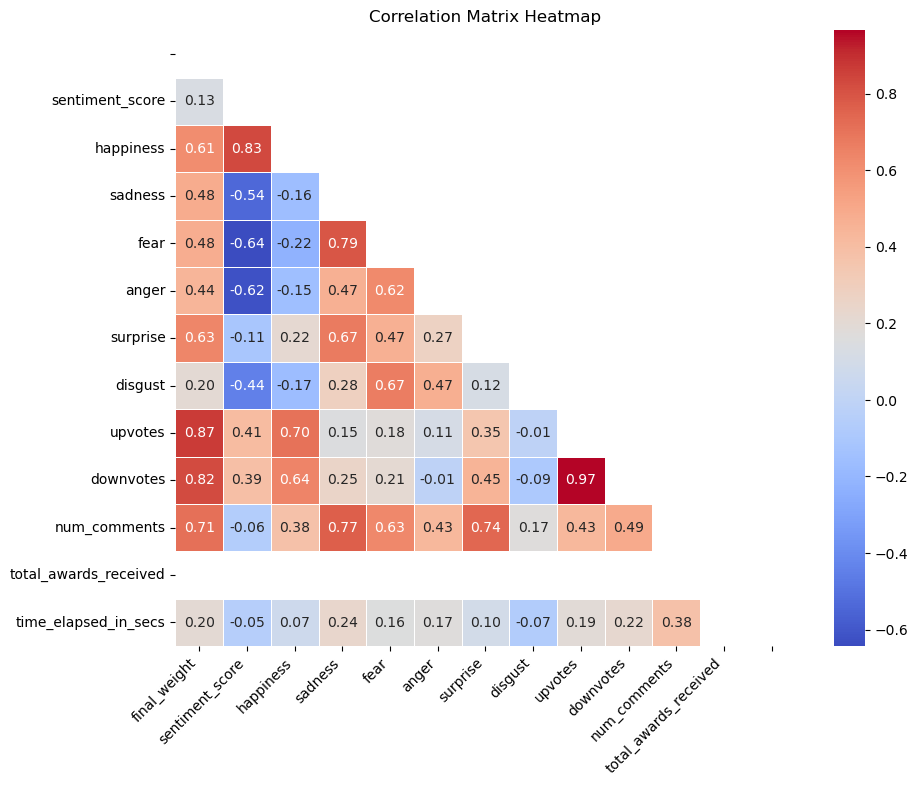

In [5]:
corr_matrix = df_numerical.corr()

# Plot the heatmap of the correlation matrix after masking the duplicate half along the diagonal and extra labels
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.gca().set_xticklabels([label if idx != len(corr_matrix.columns) - 1 else '' 
                           for idx, label in enumerate(corr_matrix.columns)], rotation=45, ha='right')
plt.gca().set_yticklabels([label if idx != 0 else '' 
                           for idx, label in enumerate(corr_matrix.index)])

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

ValueError: Could not interpret value `awards` for `x`. An entry with this name does not appear in `data`.

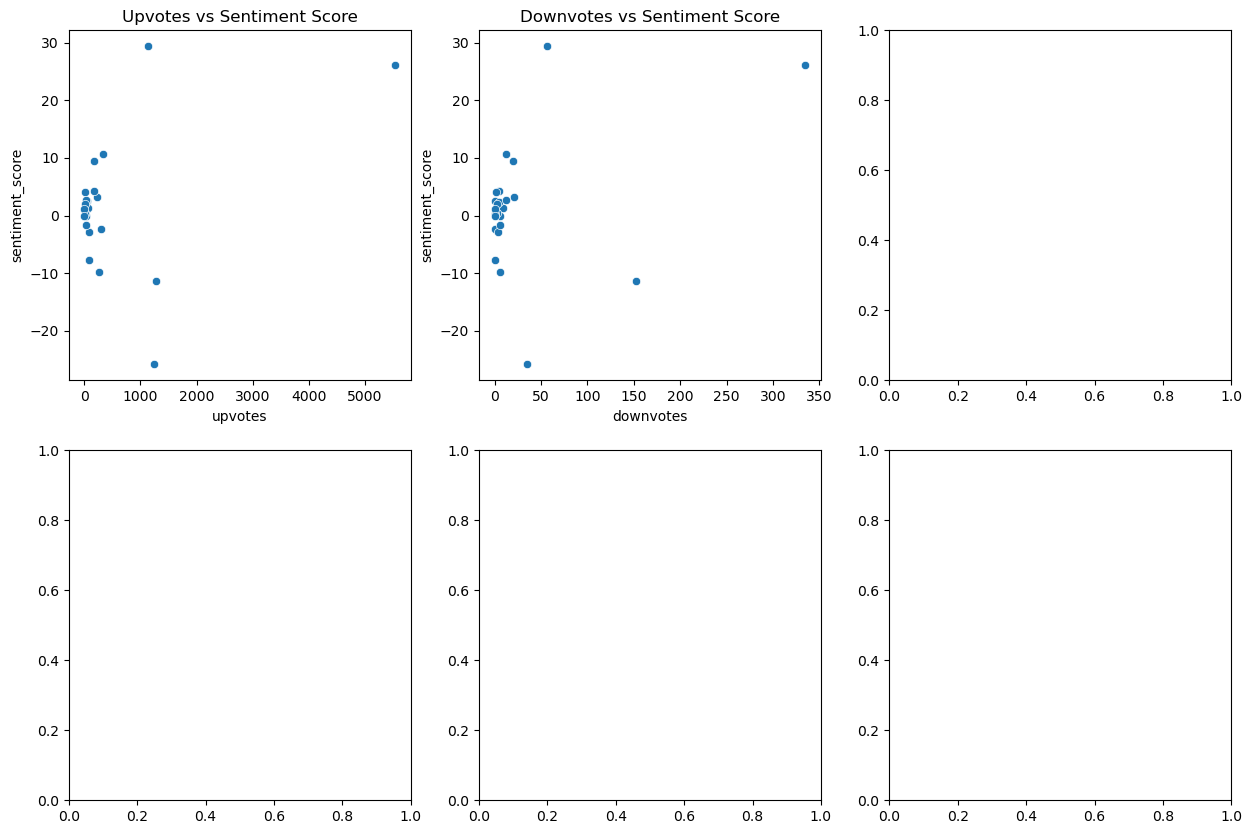

In [10]:
# Display scatterplot
sns.pairplot(df_numerical)
plt.show()

# Save the entire figure with multiple plots to a file
plt.savefig('scatterplot_grid.png', dpi=300)